<a href="https://colab.research.google.com/github/sonupp13/MACHINE-LEARNING-ALGORITHMS/blob/main/UNSUPERVISED%20ML/DS_K_MEAN_CLUSTERINGipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv")

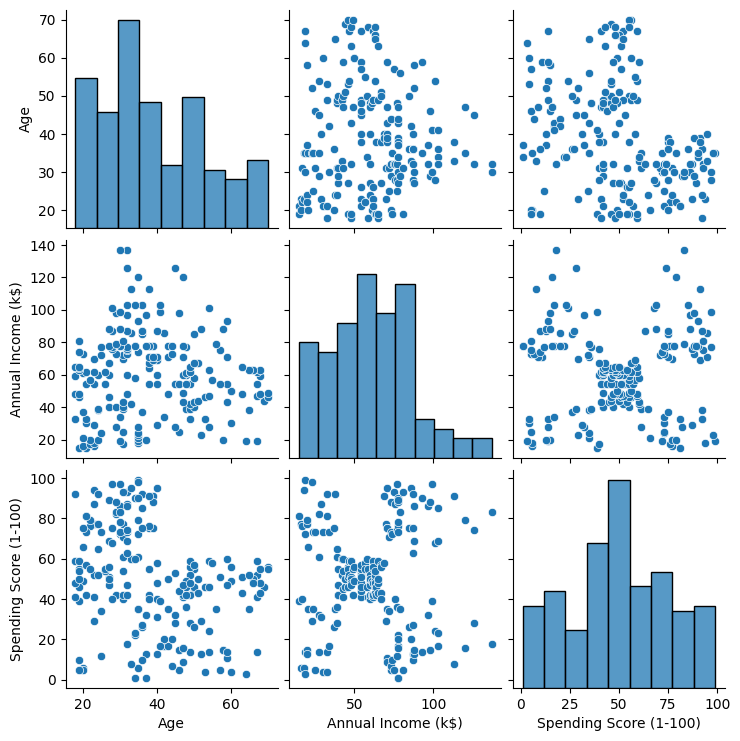

In [ ]:
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [ ]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Choosing Number of Clusters (Elbow Method)


# Using the Elbow Method, we’ll plot the Within-Cluster Sum of Squares (WCSS) against
# different numbers of clusters.


# After calculating WCSS for different numbers of clusters, we’ll plot the number of
# clusters against their respective WCSS values.


# WCSS stands for "Within-Cluster Sum of Squares."
# it refers to the sum of squared distances between each data point and
# the centroid of the cluster to which it has been assigned.


In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

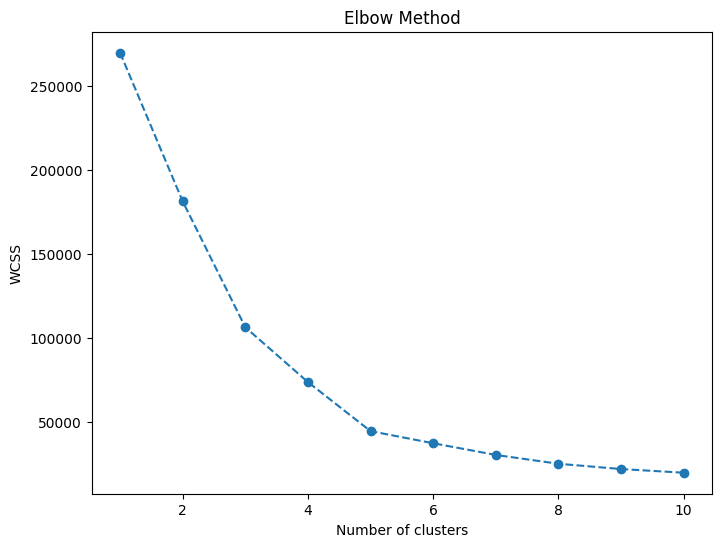

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
data['Cluster'] = kmeans.labels_

In [ ]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


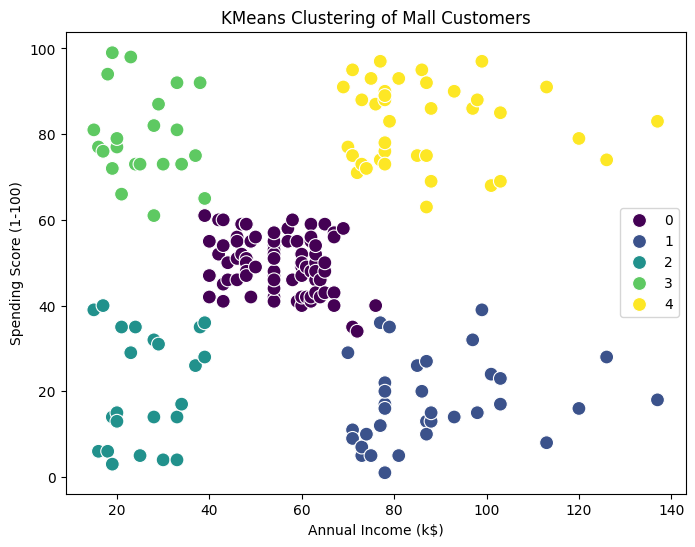

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Cluster', palette='viridis', s=100)
plt.title('KMeans Clustering of Mall Customers')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
y = kmeans.labels_
silhouette = silhouette_score(X, y)
print(f"Silhouette Score: {(silhouette)}")

# The silhouette score is specialized for measuring cluster quality when the clusters are convex-shaped,
# and may not perform well if the data clusters have irregular shapes or are of varying sizes.
# The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

Silhouette Score: 0.553931997444648
